#NLP Project SMS SPAM Classification

##Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp '/content/kaggle.json' ~/.kaggle

cp: cannot stat '/content/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 76.7MB/s]


In [5]:
!unzip /content/sms-spam-collection-dataset.zip

Archive:  /content/sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [6]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


##EDA

In [7]:
df.shape

(5572, 5)

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df = df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis =1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns=["label","message"]
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


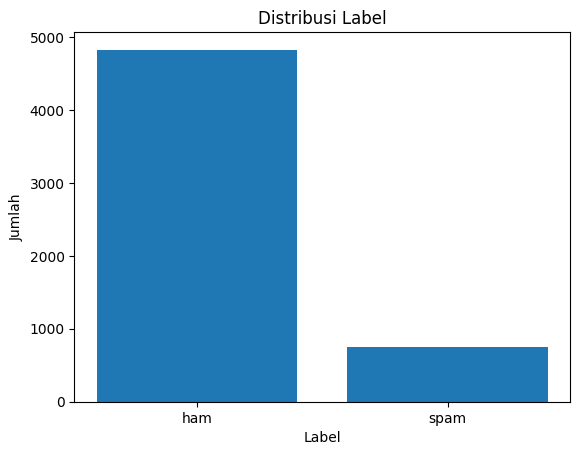

In [12]:
message_counts = df['label'].value_counts()
plt.bar(message_counts.index, message_counts.values)
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Label')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df['label'] = encode.fit_transform(df['label'])

In [14]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


##Data Preprocesssing

In [17]:
import re
import string

def clean_data (text):
  text = str(text).lower() #membuat teks menjadi lowercase
  text = re.sub ('\[.*?]', '', text)
  text = re.sub ('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

In [18]:
df['message'] = df['message'].apply(clean_data)
df.head()

,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [19]:
#stopword (is, a, the, dan lain-lain)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
stop_words=stopwords.words("english")
more_stopwords=['u','im','c']
stop_words = stop_words + more_stopwords

In [21]:
def stopword(text):
  text=' '.join(word for word in text.split(' ') if word not in stop_words)
  return text

In [22]:
df['message'] = df['message'].apply(stopword)
df.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif oni
2,1,free entry wkly comp win fa cup final tkts m...
3,0,dun say early hor already say
4,0,nah dont think goes usf lives around though


In [23]:
#stemming (membuat kata menjadi kata dasar)
import nltk
stemmer=nltk.SnowballStemmer("english")

In [24]:
def stemming(text):
  text=' '.join(stemmer.stem(word) for word in text.split(" "))
  return text

In [25]:
df['message'] = df['message'].apply(stemming)
df.head()

,label,message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif oni
2,1,free entri wkli comp win fa cup final tkts m...
3,0,dun say earli hor alreadi say
4,0,nah dont think goe usf live around though


In [26]:
!pip install wordCloud

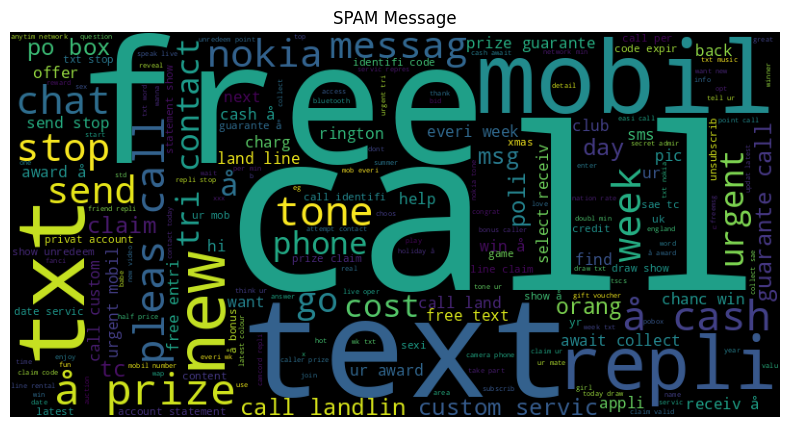

In [27]:
from wordcloud import WordCloud

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black')

wordcloud.generate (' '.join (text for text in df.loc[df['label'] == 1, 'message']))

# Tampilkan word cloud dengan matplotlib

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title('SPAM Message')
plt.axis('off')
plt.show()

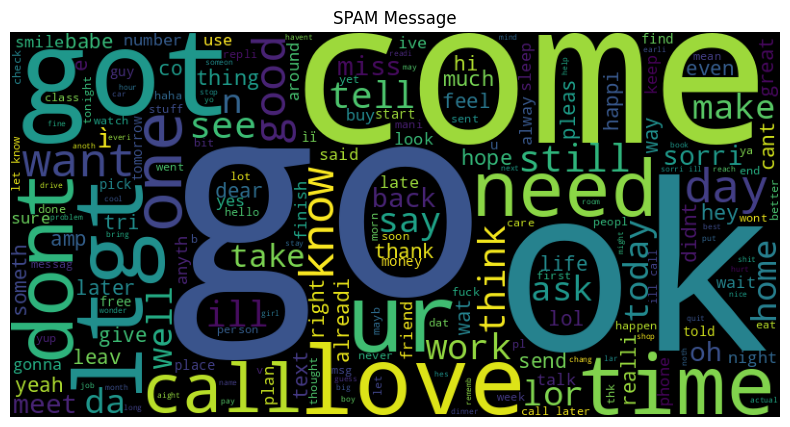

In [28]:
# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black')

wordcloud.generate (' '.join (text for text in df.loc[df['label'] == 0, 'message']))

# Tampilkan word cloud dengan matplotlib

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title('SPAM Message')
plt.axis('off')
plt.show()

##Split Data

In [29]:
from sklearn.model_selection import train_test_split
x = df['message']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=20)


print('Train Size : ', x_train.shape)
print('Test Size  : ', x_test.shape)

Train Size :  (3900,)
Test Size  :  (1672,)


##Modelling

In [30]:
OOV_TOKEN = "<OOV>"
TRUNCATING = 'post'
PADDING = 'post'
MAXLEN = 16

In [31]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token =OOV_TOKEN)
tokenizer.fit_on_texts(x_train)

In [32]:
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index) +1

In [33]:
VOCAB_SIZE

5530

In [34]:
from keras.preprocessing.sequence import pad_sequences

def seq_pad_and_trunc(sentences, tokenizer, padding, truncating, maxlen):
  sequences = tokenizer.texts_to_sequences(sentences)
  pad_trunc_sequences = pad_sequences(sequences, maxlen=maxlen, padding=padding,truncating=truncating)
  return pad_trunc_sequences

In [35]:
train_pad_trunc_seq = seq_pad_and_trunc(x_train, tokenizer, PADDING, TRUNCATING, MAXLEN)
test_pad_trunc_seq = seq_pad_and_trunc(x_test, tokenizer, PADDING, TRUNCATING, MAXLEN)

In [36]:
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [37]:
test_labels.shape

(1672,)

In [38]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential

In [39]:
def create_model():

      model = Sequential()
      model.add(Embedding(VOCAB_SIZE, 32, input_length=MAXLEN))
      model.add(LSTM(100))
      model.add(Dropout(0.4))
      model.add(Dense(20, activation="relu"))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation = "sigmoid"))
      return model
lstm_model = create_model()
lstm_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 32)            176960    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 232201 (907.04 KB)
Trainable params: 23220

In [40]:
history = lstm_model.fit(train_pad_trunc_seq, train_labels, epochs=10,
                    validation_data= (test_pad_trunc_seq, test_labels))

Epoch 1/10
122/122 [==============================] - 8s 34ms/step - loss: 0.2576 - accuracy: 0.9182 - val_loss: 0.1116 - val_accuracy: 0.9695
Epoch 2/10
122/122 [==============================] - 3s 27ms/step - loss: 0.0575 - accuracy: 0.9900 - val_loss: 0.0977 - val_accuracy: 0.9719
Epoch 3/10
122/122 [==============================] - 4s 33ms/step - loss: 0.0324 - accuracy: 0.9941 - val_loss: 0.1332 - val_accuracy: 0.9713
Epoch 4/10
122/122 [==============================] - 4s 37ms/step - loss: 0.0181 - accuracy: 0.9972 - val_loss: 0.1187 - val_accuracy: 0.9719
Epoch 5/10
122/122 [==============================] - 3s 23ms/step - loss: 0.0158 - accuracy: 0.9982 - val_loss: 0.1658 - val_accuracy: 0.9719
Epoch 6/10
122/122 [==============================] - 3s 27ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.1328 - val_accuracy: 0.9737
Epoch 7/10
122/122 [==============================] - 3s 28ms/step - loss: 0.0130 - accuracy: 0.9987 - val_loss: 0.2099 - val_accuracy: 0.9641

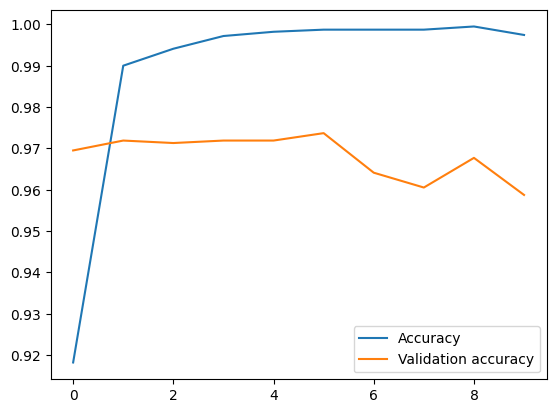

In [41]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

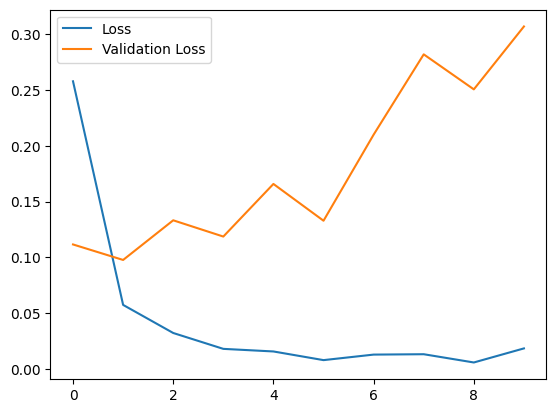

In [42]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

##Model Evaluation

In [43]:
y_pred = lstm_model.predict(test_pad_trunc_seq)
y_pred = np.where(y_pred>0.5,1,0)

53/53 [==============================] - 1s 8ms/step


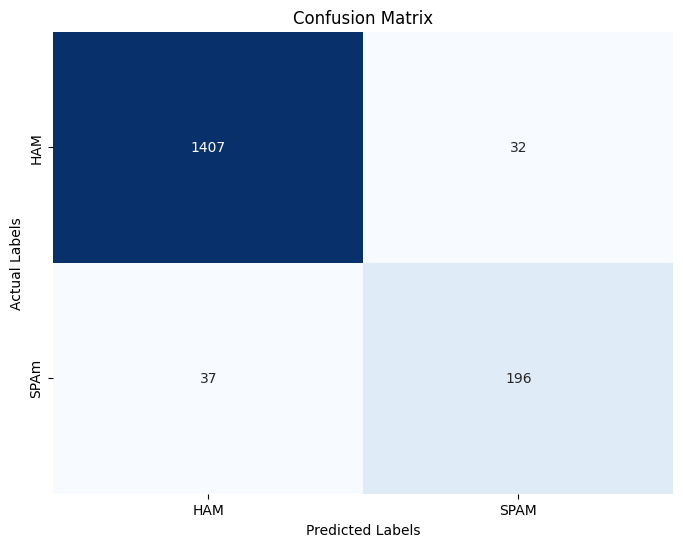

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["HAM", "SPAM"],
            yticklabels=["HAM", "SPAm"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()